## 트리

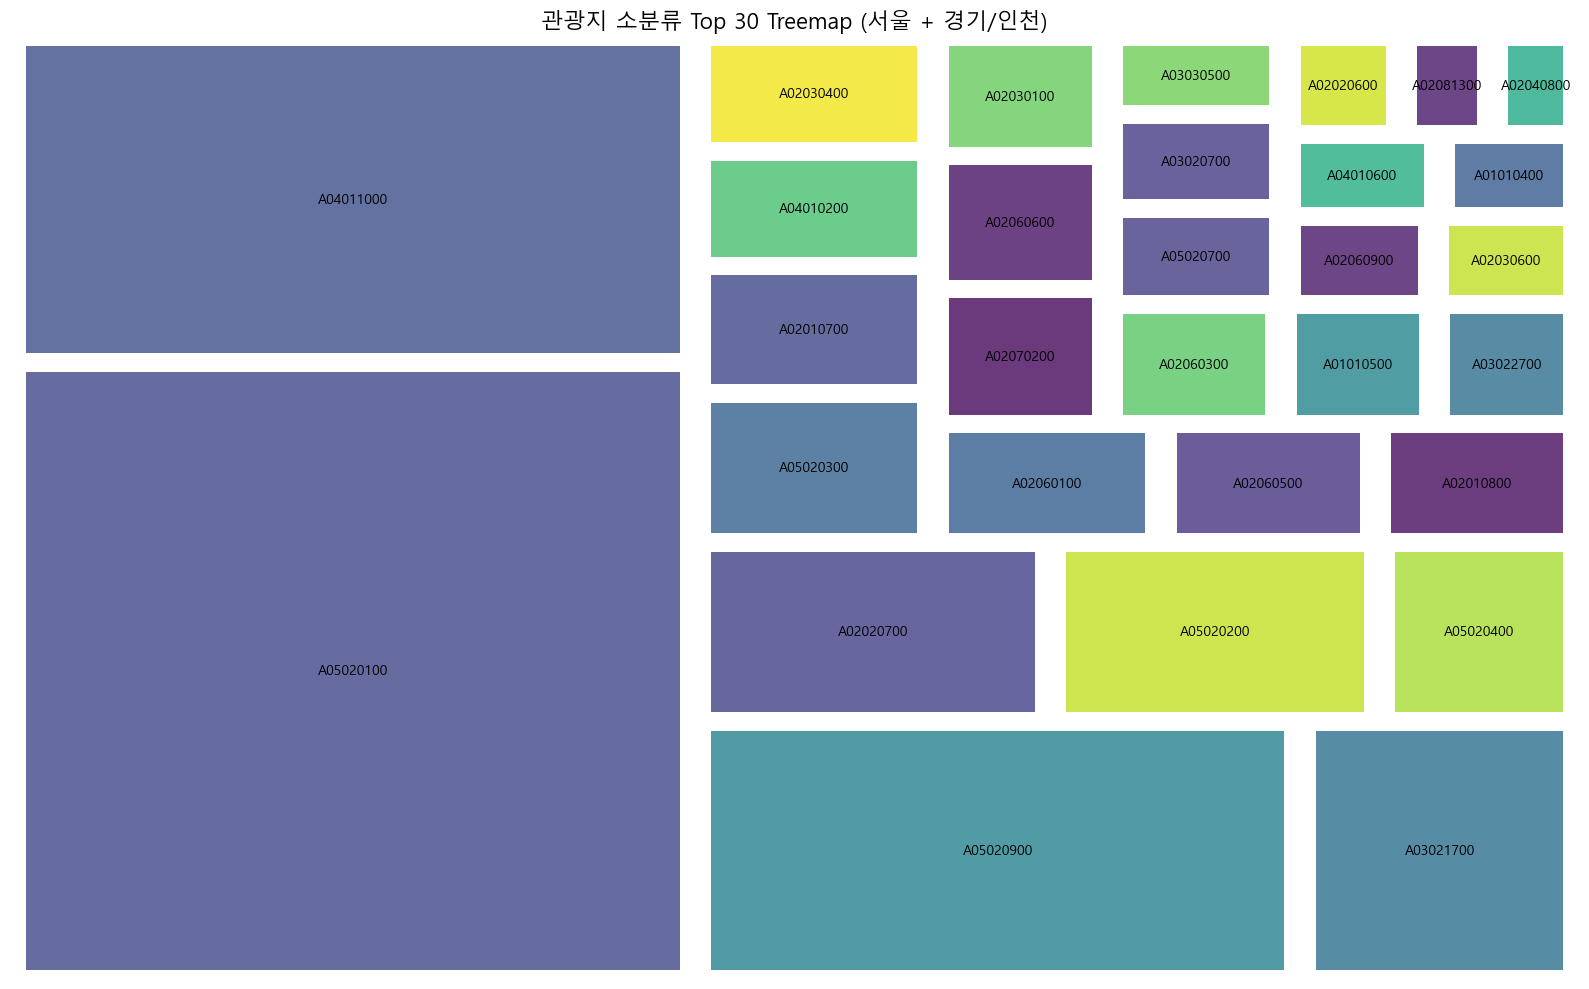

In [1]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import squarify
from dotenv import load_dotenv

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# .env 파일 로드
load_dotenv()

# 환경변수에서 파일 경로 가져오기
file_path1 = os.getenv("File_path1")  # 경기/인천 (Excel)
file_path2 = os.getenv("File_path2")  # 서울 (CSV)

# 파일 불러오기
df1 = pd.read_excel(file_path1)
df2 = pd.read_csv(file_path2)

# 서울 데이터 컬럼명 통일
df2 = df2.rename(columns={'cat1': '대분류', 'cat2': '중분류', 'cat3': '소분류'})

# 지역명 추가
df1['지역'] = '경기/인천'
df2['지역'] = '서울'

# 필요한 열만 추출
df1_subset = df1[['지역', '대분류', '중분류', '소분류']]
df2_subset = df2[['지역', '대분류', '중분류', '소분류']]

# 데이터 통합
df_combined = pd.concat([df1_subset, df2_subset], ignore_index=True)

# 소분류 기준 건수 집계
df_grouped = df_combined['소분류'].value_counts().reset_index()
df_grouped.columns = ['소분류', '건수']

# 상위 n개만 시각화 (너무 많으면 글자 겹침)
top_n = 30
df_top = df_grouped.head(top_n)

# Treemap 시각화
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=df_top['건수'],
    label=df_top['소분류'],
    alpha=0.8,
    pad=True,
    text_kwargs={'fontsize':10}
)
plt.title(f'관광지 소분류 Top {top_n} Treemap (서울 + 경기/인천)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


## Sunburst

C:\Users\hyunj\AppData\Local\Temp\ipykernel_4764\705153533.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab20c")


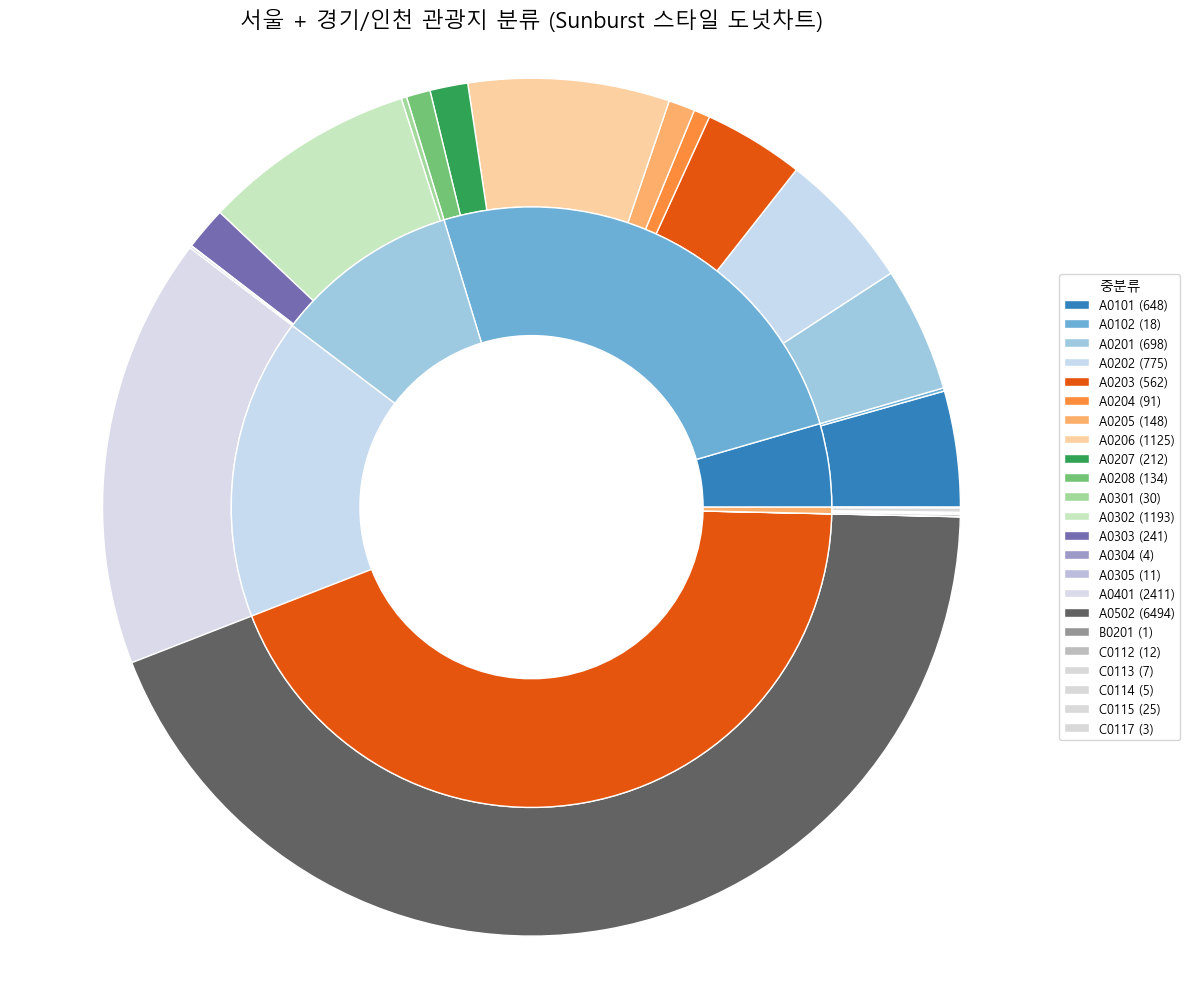

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import matplotlib.cm as cm
import numpy as np

# .env 파일 불러오기
load_dotenv()

# 환경 변수에서 파일 경로 읽기
file_path1 = os.getenv("File_path1")  # 경기/인천
file_path2 = os.getenv("File_path2")  # 서울

# 파일 불러오기
df1 = pd.read_excel(file_path1)
df2 = pd.read_csv(file_path2)

# 컬럼명 통일
df2 = df2.rename(columns={'cat1': '대분류', 'cat2': '중분류', 'cat3': '소분류'})

# 지역 정보 추가
df1['지역'] = '경기/인천'
df2['지역'] = '서울'

# 필요한 열 추출
df1_sub = df1[['지역', '대분류', '중분류']]
df2_sub = df2[['지역', '대분류', '중분류']]
df = pd.concat([df1_sub, df2_sub], ignore_index=True)

# 건수 추가
df['건수'] = 1

# 대분류 집계
df_level1 = df.groupby('대분류')['건수'].sum().reset_index()
level1_labels = df_level1['대분류'].tolist()
level1_sizes = df_level1['건수'].tolist()

# 중분류 집계
df_level2 = df.groupby(['대분류', '중분류'])['건수'].sum().reset_index()
level2_labels = df_level2['중분류'].tolist()
level2_sizes = df_level2['건수'].tolist()

# 색상 설정
cmap = cm.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(level2_labels)))
inner_colors = cmap(np.arange(len(level1_labels)))

# ✅ 차트 그리기 (라벨 제거, 범례만 표시)
fig, ax = plt.subplots(figsize=(12, 10))

# 바깥 도넛 (중분류) – 라벨 제거
outer_wedges, _ = ax.pie(
    level2_sizes,
    radius=1,
    labels=[''] * len(level2_labels),  # 라벨 제거
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# 안쪽 도넛 (대분류) – 라벨 제거
inner_wedges, _ = ax.pie(
    level1_sizes,
    radius=0.7,
    labels=[''] * len(level1_labels),  # 라벨 제거
    colors=inner_colors,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# ✅ 범례 추가 (중분류만 예시)
legend_labels = [f"{label} ({size})" for label, size in zip(level2_labels, level2_sizes)]
ax.legend(outer_wedges, legend_labels, title="중분류", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

plt.title("서울 + 경기/인천 관광지 분류 (Sunburst 스타일 도넛차트)", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()
